In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_clima = pd.read_csv('data/ClimaMVD.csv', sep=',')

In [7]:
df_clima.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,UYM00086580,"CARRASCO INTERNATIONAL, UY",-34.838,-56.031,32.0,2013-01-01,5.1,",,S",NaN,NaN,18.4,"H,,S",34.0,",,S",NaN,NaN
1,UYM00086580,"CARRASCO INTERNATIONAL, UY",-34.838,-56.031,32.0,2013-01-02,NaN,NaN,NaN,NaN,17.2,"H,,S",20.0,",,S",12.5,",,S"
2,UYM00086580,"CARRASCO INTERNATIONAL, UY",-34.838,-56.031,32.0,2013-01-03,NaN,NaN,NaN,NaN,17.8,"H,,S",NaN,NaN,NaN,NaN
3,UYM00086580,"CARRASCO INTERNATIONAL, UY",-34.838,-56.031,32.0,2013-01-04,NaN,NaN,NaN,NaN,23.0,"H,,S",NaN,NaN,13.8,",,S"
4,UYM00086580,"CARRASCO INTERNATIONAL, UY",-34.838,-56.031,32.0,2013-01-05,NaN,NaN,NaN,NaN,25.6,"H,,S",NaN,NaN,17.0,",,S"


In [17]:
df_clima.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
count,4.314000e+03,4314.000,4314.0,3212.000000,79.000000,4314.000000,1465.000000,1839.000000
mean,-3.483800e+01,-56.031,32.0,3.535243,23.531646,16.815299,22.421024,11.968352
std,7.106251e-15,0.000,0.0,11.564861,20.777105,5.130983,6.003372,5.369172
min,-3.483800e+01,-56.031,32.0,0.000000,10.000000,3.900000,7.400000,-3.200000
25%,-3.483800e+01,-56.031,32.0,0.000000,10.000000,12.700000,17.800000,8.000000
50%,-3.483800e+01,-56.031,32.0,0.000000,10.000000,17.100000,22.300000,12.000000
75%,-3.483800e+01,-56.031,32.0,0.500000,30.000000,21.000000,27.000000,16.400000
max,-3.483800e+01,-56.031,32.0,178.100000,99.000000,31.000000,40.400000,25.600000


In [9]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          4314 non-null   object 
 1   NAME             4314 non-null   object 
 2   LATITUDE         4314 non-null   float64
 3   LONGITUDE        4314 non-null   float64
 4   ELEVATION        4314 non-null   float64
 5   DATE             4314 non-null   object 
 6   PRCP             3212 non-null   float64
 7   PRCP_ATTRIBUTES  3212 non-null   object 
 8   SNWD             79 non-null     float64
 9   SNWD_ATTRIBUTES  79 non-null     object 
 10  TAVG             4314 non-null   float64
 11  TAVG_ATTRIBUTES  4314 non-null   object 
 12  TMAX             1465 non-null   float64
 13  TMAX_ATTRIBUTES  1465 non-null   object 
 14  TMIN             1839 non-null   float64
 15  TMIN_ATTRIBUTES  1839 non-null   object 
dtypes: float64(8), object(8)
memory usage: 539.4+ KB


In [15]:
#Se eliminan las columnas que no se utilizaran
df_clima_red = df_clima.drop(['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','PRCP_ATTRIBUTES','SNWD_ATTRIBUTES','SNWD', 'TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'], axis=1).copy()

In [16]:
# Contando valores nulos
df_clima_red.isnull().sum()

DATE       0
PRCP    1102
TAVG       0
TMAX    2849
TMIN    2475
dtype: int64

- Hay muchos valores nulos principalemente en T max y T min

In [18]:
# Transformando la columna DATE a formato datetime
df_clima_red['DATE'] = pd.to_datetime(df_clima_red['DATE'])

In [19]:
# Creando columnas para el año y mes
df_clima_red['ANO'] = df_clima_red['DATE'].dt.year
df_clima_red['MES'] = df_clima_red['DATE'].dt.month


In [21]:
# Contando datos no nulos por año
df_clima_red.groupby('ANO').count()


,DATE,PRCP,TAVG,TMAX,TMIN,MES
ANO,,,,,,
2013,365,123,365,178,202,365
2014,365,137,365,170,278,365
2015,365,159,365,187,263,365
2016,366,364,366,151,304,366
2017,365,355,365,173,121,365
2018,365,349,365,113,90,365
2019,365,352,365,0,0,365
2020,366,326,366,0,0,366
2021,363,288,363,90,138,363


- El único valor que está casi completo es la TAVG, temperatura promedio

In [22]:
# Eliminando los datos nulos
df_clima_red_2 = df_clima_red.dropna().copy()

In [23]:
df_clima_red_2.describe()

,DATE,PRCP,TAVG,TMAX,TMIN,ANO,MES
count,558,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,2018-06-03 20:28:23.225806336,4.714695,16.995878,22.602867,13.238351,2017.960573,6.071685
min,2013-01-25 00:00:00,0.000000,3.900000,7.400000,-3.200000,2013.000000,1.000000
25%,2015-11-07 12:00:00,0.000000,12.900000,17.800000,9.525000,2015.000000,3.000000
50%,2016-11-25 12:00:00,0.000000,17.600000,22.600000,13.200000,2016.000000,6.000000
75%,2021-07-26 18:00:00,2.950000,21.000000,27.000000,17.400000,2021.000000,9.000000
max,2024-10-13 00:00:00,128.800000,28.500000,40.400000,25.600000,2024.000000,12.000000
std,NaN,12.467834,5.001494,6.025707,5.090527,3.630395,3.383117


- Si eliminamos los datos nulos solamente nos quedan 558 dias (registros) de los 4300 iniciales

- Otra opción puede ser usar solamente precipitaciones y temperatura promedio
- Temperatura promedio ya va a tener el efecto de Tmin y Tmax

In [61]:
df_clima_red_4 = df_clima_red.drop(['TMAX','TMIN'], axis=1).copy()

In [62]:
df_clima_red_4.describe()

,DATE,PRCP,TAVG,ANO,MES
count,4314,3212.000000,4314.000000,4314.000000,4314.000000
mean,2018-11-28 09:12:26.036161280,3.535243,16.815299,2018.414465,6.457812
min,2013-01-01 00:00:00,0.000000,3.900000,2013.000000,1.000000
25%,2015-12-15 06:00:00,0.000000,12.700000,2015.000000,4.000000
50%,2018-11-27 12:00:00,0.000000,17.100000,2018.000000,6.000000
75%,2021-11-11 18:00:00,0.500000,21.000000,2021.000000,9.000000
max,2024-10-31 00:00:00,178.100000,31.000000,2024.000000,12.000000
std,NaN,11.564861,5.130983,3.410372,3.421296


In [63]:
df_clima_red_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    4314 non-null   datetime64[ns]
 1   PRCP    3212 non-null   float64       
 2   TAVG    4314 non-null   float64       
 3   ANO     4314 non-null   int32         
 4   MES     4314 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 134.9 KB


- Solamente hay cerca de 1000 datos faltantes en Precipitaciones
- No elimino datos faltantes porque algunos modelos de ML pueden manejar esos datos

In [65]:
# Contando datos que tenemos por año
df_clima_red_4.groupby('ANO').count()

,DATE,PRCP,TAVG,MES
ANO,,,,
2013,365,123,365,365
2014,365,137,365,365
2015,365,159,365,365
2016,366,364,366,366
2017,365,355,365,365
2018,365,349,365,365
2019,365,352,365,365
2020,366,326,366,366
2021,363,288,363,363


<Axes: ylabel='TAVG'>

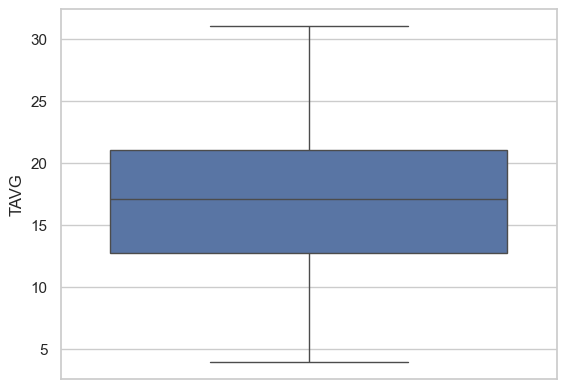

In [66]:
# Grafico de boxplot de la temperatura promedio
sns.boxplot(y='TAVG', data=df_clima_red_4)

<Axes: xlabel='MES', ylabel='TAVG'>

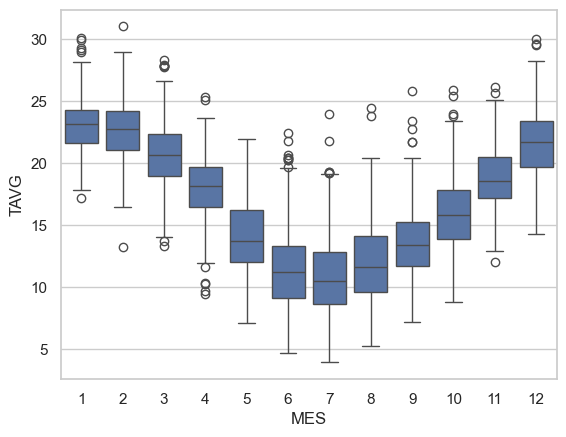

In [67]:
# Grafico de boxplot de la temperatura promedio
sns.boxplot(y='TAVG', x='MES', data=df_clima_red_4)

- Hay diferencias en T promedio entre los diferentes meses y algunos outliers

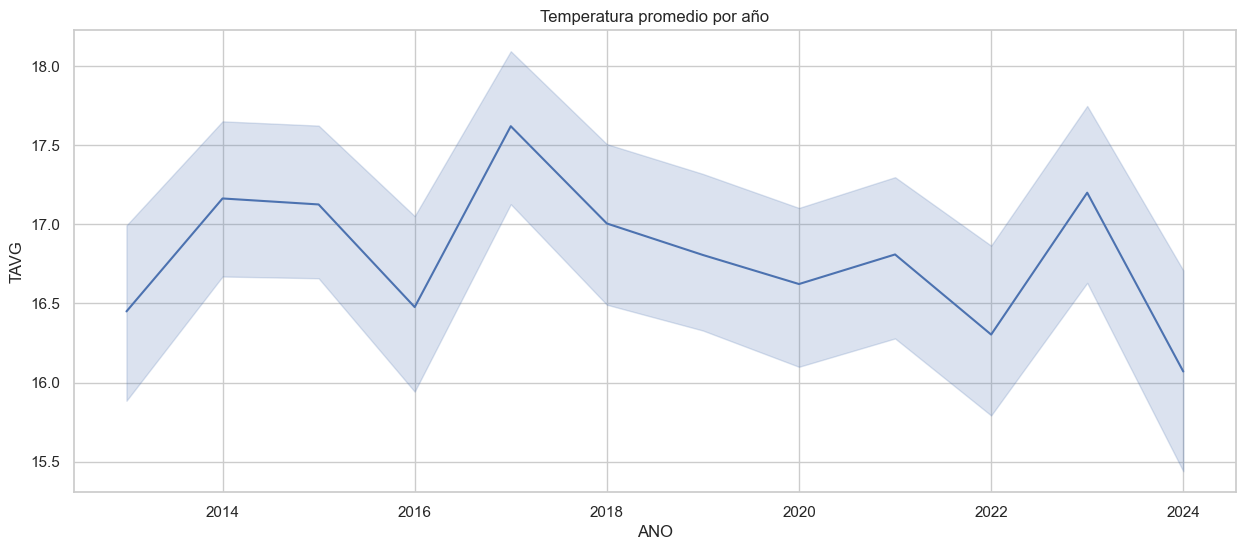

In [68]:
# Graficando la temperatura promedio por año

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_clima_red_4, x='ANO', y='TAVG')
plt.title('Temperatura promedio por año')
plt.show()


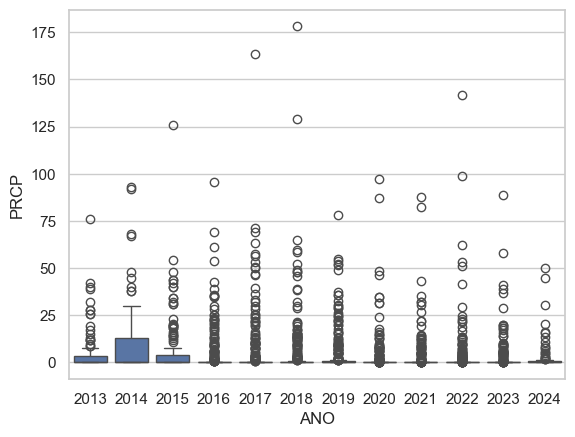

In [70]:
# Grafico boxplot de precipitaciones
sns.boxplot(y='PRCP', data=df_clima_red_4, x='ANO')
plt.show()

- Hay muchos outliers, creo que está bueno porque van a ser días muy lluviosos en los que habrá diferencias en los delitos.

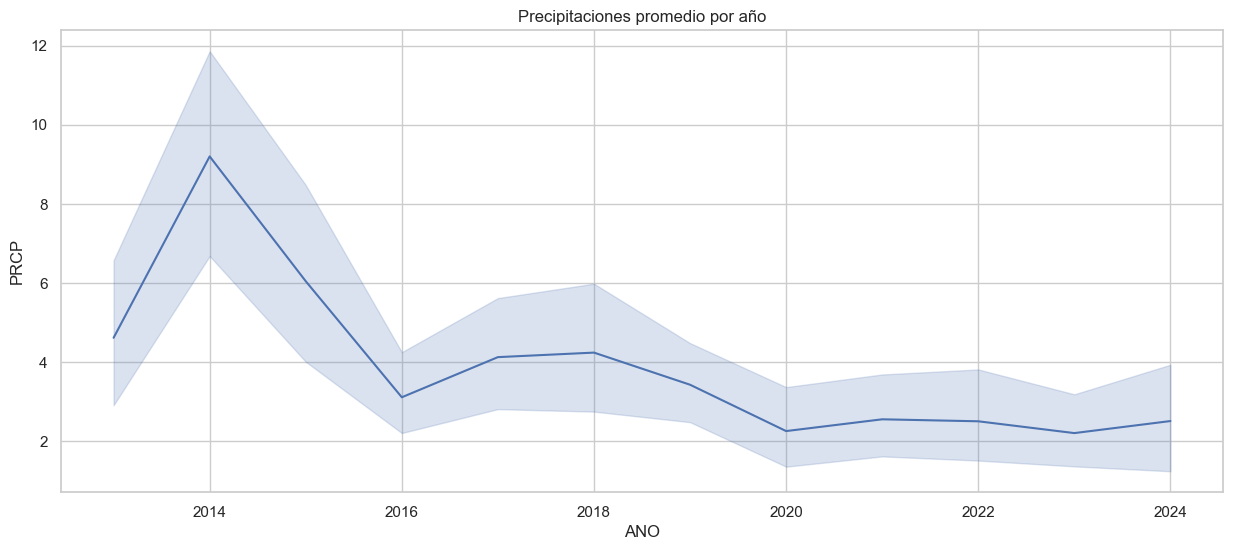

In [71]:
# Graficando las precipitaciones promedio por año

plt.figure(figsize=(15, 6))
sns.lineplot(data=df_clima_red_4, x='ANO', y='PRCP')
plt.title('Precipitaciones promedio por año')
plt.show()

In [73]:
# Exportamos el dataset con temperatura promedio y precipitaciones
df_clima_red_4.to_csv('data/ClimaMVD_clean.csv', index=False)